In [1]:
# This is the import cell
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)

In [2]:
# Get the current path
if first:
    parent = os.getcwd()
os.chdir(parent)

# Grab file names from data folder
data = os.listdir('data')
try:
    data.remove('.DS_Store')
except:
    pass
print(data)

['pe200.0_lattice0.95.txt', 'active_pe300.0_lattice1.05.txt', 'active_pe100.0_lattice0.85.txt', 'pe300.0_lattice0.9.txt', 'active_pe300.0_lattice1.0.txt', 'pe400.0_lattice0.85.txt', 'pe50.0_lattice0.95.txt', 'pe300.0_lattice0.95.txt', 'active_pe200.0_lattice1.05.txt', 'pe300.0_lattice0.8.txt', 'pe400.0_lattice1.0.txt', 'pe500.0_lattice0.85.txt', 'active_pe400.0_lattice0.9.txt', 'active_pe500.0_lattice0.95.txt', 'active_pe300.0_lattice0.85.txt', 'pe350.0_lattice0.9.txt', 'active_pe100.0_lattice1.05.txt', 'active_pe350.0_lattice1.0.txt', 'pe350.0_lattice0.8.txt', 'active_pe400.0_lattice0.95.txt', 'pe100.0_lattice0.95.txt', 'pe450.0_lattice1.0.txt', 'active_pe450.0_lattice0.9.txt', 'active_pe200.0_lattice0.85.txt', 'active_pe200.0_lattice0.95.txt', 'pe100.0_lattice0.85.txt', 'active_pe400.0_lattice0.85.txt', 'active_pe300.0_lattice0.95.txt', 'active_pe500.0_lattice0.85.txt', 'active_pe400.0_lattice1.05.txt', 'pe500.0_lattice0.95.txt', 'pe300.0_lattice0.85.txt', 'pe50.0_lattice0.85.txt', '

In [3]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, string):
    for i in xrange(len(fname)):
        if fname[i] == string[0]:
#             print"{} matches {}".format(fname[i], string[0])
            for j in xrange(1, len(string)):
                if fname[i + j] == string[j]:
#                     print"{} matches {}".format(fname[i+j], string[j])
                    if j == (len(string) - 1):
#                         print"Final match!"
                        return True
                else:
                    break
    return False
    
def txtValue(fname, string):
    out = ""
    index = 0
    for i in xrange(len(fname)):
        if fname[i] == string[0]:
            for j in xrange(1, len(string)):
                if fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        # Last index of search string
                        index = i + j
                else:
                    break
                        
    # First index of value
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        elif fname[index] == ".":    
            if fname[index+1].isdigit():
                out = out + fname[index]
                index += 1
            else:
                mybool = False
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    ind = np.arange(0, len(arr1))
    for i in xrange(len(cpy1)):
        for j in xrange(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]      
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in xrange(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [4]:
print(data[0])
print(checkFile(data[0], "active"))

pe200.0_lattice0.95.txt
False


In [5]:
# Grab parameters, sort them
actList = []
peList = []
latList = []

for i in xrange(len(data)):
    if checkFile(data[i], "active"):
        actList.append(1)
    else:
        actList.append(0)
        
    if checkFile(data[i], "pe"):
        peList.append(txtValue(data[i], "pe"))
    else:
        peList.append(0)
    
    if checkFile(data[i], "lattice"):
        latList.append(txtValue(data[i], "lattice"))
    else:
        latList.append(0)

# # Take a look at your lists
# print(actList)
# print(peList)
# print(latList)        

# Sort the arrays
if len(peList) > 1:
    # Sort them!
    print("Sorting... ")
    indArr = multiSort(actList, peList, latList)
    indSort(data, indArr)
    indSort(peList, indArr)
    indSort(latList, indArr)
    indSort(actList, indArr)

# Print the sorted array
print("Sorted textfiles:")
for i in data:
    print(i)
    
# Now that the data is sorted, read it into a dataframe
all_data = []
os.chdir('data')
for i in xrange(len(data)):
    df = pd.read_csv(data[i], sep='\s+', header=0)
    all_data.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_data[0])
# print(all_data[0]['Timestep'])
# print(all_data[0]['Timestep'][0])

Sorting... 
Sorted textfiles:
pe50.0_lattice0.75.txt
pe50.0_lattice0.8.txt
pe50.0_lattice0.85.txt
pe50.0_lattice0.9.txt
pe50.0_lattice0.95.txt
pe50.0_lattice1.0.txt
pe100.0_lattice0.75.txt
pe100.0_lattice0.8.txt
pe100.0_lattice0.85.txt
pe100.0_lattice0.9.txt
pe100.0_lattice0.95.txt
pe100.0_lattice1.0.txt
pe150.0_lattice0.75.txt
pe150.0_lattice0.8.txt
pe150.0_lattice0.85.txt
pe150.0_lattice0.9.txt
pe150.0_lattice0.95.txt
pe150.0_lattice1.0.txt
pe200.0_lattice0.75.txt
pe200.0_lattice0.8.txt
pe200.0_lattice0.85.txt
pe200.0_lattice0.9.txt
pe200.0_lattice0.95.txt
pe200.0_lattice1.0.txt
pe250.0_lattice0.75.txt
pe250.0_lattice0.8.txt
pe250.0_lattice0.85.txt
pe250.0_lattice0.9.txt
pe250.0_lattice0.95.txt
pe250.0_lattice1.0.txt
pe300.0_lattice0.75.txt
pe300.0_lattice0.8.txt
pe300.0_lattice0.85.txt
pe300.0_lattice0.9.txt
pe300.0_lattice0.95.txt
pe300.0_lattice1.0.txt
pe350.0_lattice0.75.txt
pe350.0_lattice0.8.txt
pe350.0_lattice0.85.txt
pe350.0_lattice0.9.txt
pe350.0_lattice0.95.txt
pe350.0_latt

,Activity,Lattice,Infiltrate,Velocity
0,50.0,0.75,n,0.0


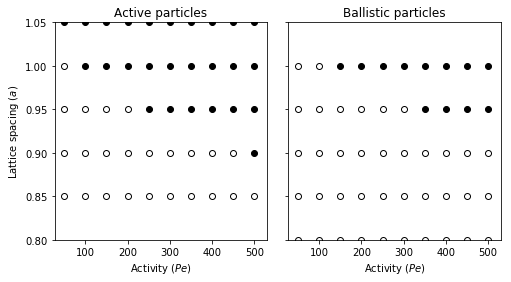

In [31]:
# Plot as filled or unfilled points
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
for i in xrange(len(all_data)):
    # If active...
    if actList[i]:
        if all_data[i]['Infiltrate'][0] == 'y':
            ax[0].scatter(peList[i], latList[i], facecolors='k', edgecolors='k')
        else:
            ax[0].scatter(peList[i], latList[i], facecolors='w', edgecolors='k')
    # Else ballistic
    else:
        if all_data[i]['Infiltrate'][0] == 'y':
            ax[1].scatter(peList[i], latList[i], facecolors='k', edgecolors='k')
        else:
            ax[1].scatter(peList[i], latList[i], facecolors='w', edgecolors='k')

ax[0].set_ylim(0.8, 1.05)
ax[1].set_ylim(0.8, 1.05)
ax[0].set_xlabel(r'Activity $(Pe)$')
ax[1].set_xlabel(r'Activity $(Pe)$')
ax[0].set_ylabel(r'Lattice spacing $(a)$')
ax[0].set_title('Active particles')
ax[1].set_title('Ballistic particles')
plt.subplots_adjust(wspace=0.1)
plt.show()